# **Roll number : CE137**

  #Task 1: Try the algo on Same Whether dataset - LabelEncoding of features:and Train test Division 95%-5%
  
**Instruction for Task-1 & 2:**

i) Set Random state and maximum allowed leaf of model equals to your roll number (or last 2 digit of your id -if you don't have roll number)


**Questions: For Task - 1**

(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

(2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

(3) Accuracy , precision and recall of both Models?

In [2]:
# Import necessary libraries
import numpy as np 
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import tkinter
import graphviz

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [5]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:   " ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:  " ,Humidity_encoded)
print("Wind:      " ,Wind_encoded)
print("Play:      " ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather:    [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity:   [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind:       [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play:       [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [6]:
features = tuple(zip(Outlook_encoded, Temperature_encoded, Humidity_encoded, Wind_encoded))
print(features)

target = tuple(Play_encoded)
print(target)

((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))
(0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0)


In [7]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets into 95% - 5%
data_train, data_test, target_train, target_test = train_test_split(features,
                        target, test_size = 0.05, random_state = 137)

In [8]:
#Create a Decision Tree Classifier (using Entropy)
dt_classifier = DecisionTreeClassifier()

# Train the model using the training sets
model = dt_classifier.fit(data_train, target_train)

In [9]:
# Predict the classes of test data
test_pred = model.predict(data_test)
# print(test_pred.dtype)

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='weather_tree.dot',feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'],
               class_names=['Yes', 'No'], filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'weather_tree.dot', '-o', 'weather_tree.png', '-Gdpi=600'])

0

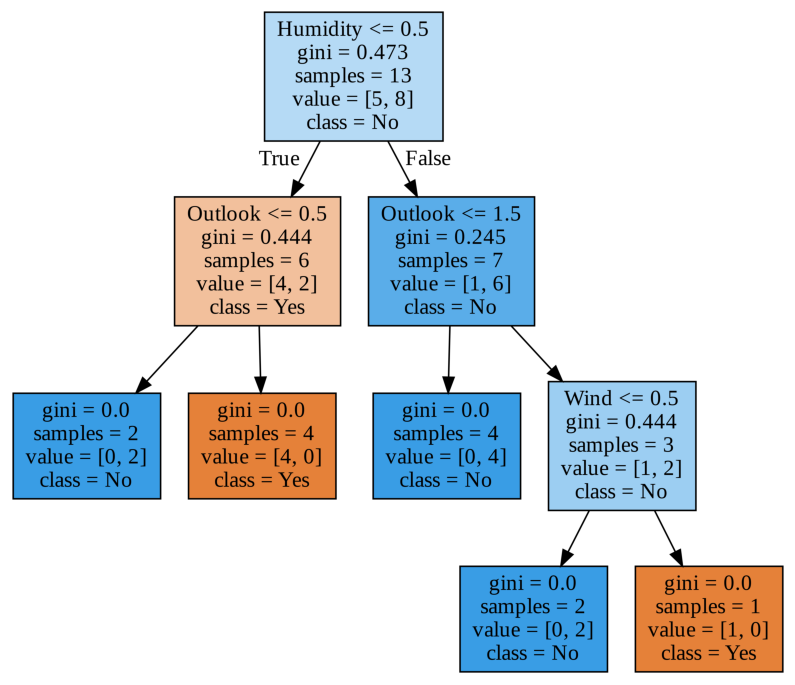

In [11]:
# Displaying in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('weather_tree.png'))
plt.axis('off')
plt.show()

#**Solution**

In [12]:
# 1st question and 2nd question
model.predict([[1,2,1,0], [2, 0, 0, 1]])

array([1, 0])

In [14]:
# 3rd question
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, test_pred))
print("Precision:", metrics.precision_score(target_test, test_pred))
print("Recall:", metrics.recall_score(target_test, test_pred))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
